<a href="https://colab.research.google.com/github/marekrei/ic-co395-intro-to-ml/blob/master/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4-5: Artificial Neural Networks


Loading the necessary libraries and the dataset.


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('https://raw.githubusercontent.com/marekrei/ic-co395-intro-to-ml/master/data/country-stats.csv')
data.head()


,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Finding a Good Model

We can try a very basic model: $y=x$

If $x$ and $y$ are very highly correlated and in the same range, then this can actually give a reasonable result.

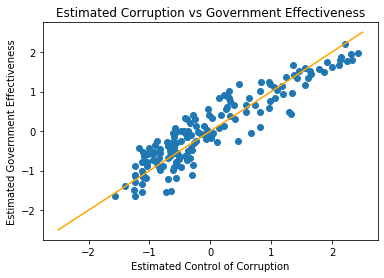

In [7]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Estimated Government Effectiveness (scale -2.5 to 2.5)"])
plt.title('Estimated Corruption vs Government Effectiveness')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Estimated Government Effectiveness")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

However, for most practical cases this is not true, with $x$ and $y$ varying along very different ranges.

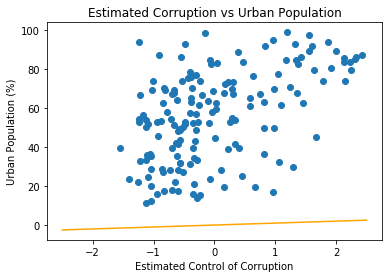

In [8]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

Multiplying the value $x$ with parameter $a$ (the *slope*) will change the angle of the line.

Adding the intercept $b$ (also known as *bias*) moves the line up and down.

Putting these together, we get the simple linear regression model: $y = ax + b$

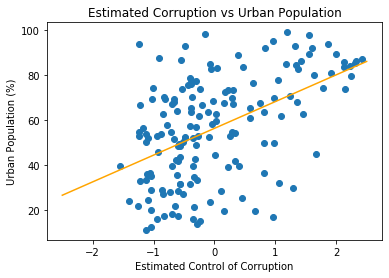

In [9]:
from sklearn.linear_model import LinearRegression
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()